# Statistical Mechanics Python Template


### Table of Contents

1. [Imports](#imports)
2. [Statistical mechanics](#statistical-mechanics)
3. [Plotting - Matplotlib](#plotting-matplotlib)
4. [Plotting - Plotly](#plotting-plotly)


Here are some helper functions for doing statistical mechanics calculations and plotting.

### Imports <a id="imports"></a>

Let's import all the packages we might need. **Remember you need to evaluate this cell first.** You may want to just use Cell > Run All to make everything work.

In [4]:
# Usual functions for math: np.exp, np.linspace, etc...
import numpy as np

# Spreadsheet-style tables (with data in rows and labeled columns) in Python
import pandas as pd

# Dictionaries that can use a.b rather than a['b'] (easier to type)
from munch import Munch

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px

# An easy way to make things interactive...
from ipywidgets import interact

# Physical constants
kB = 1.381e-23 # J/K
h = 6.626e-34 # Js
R = 8.314 # J/mol-K
R_kJ = R / 1000 # kJ/mol-K

# Units; add any other conversion factors you need 
amu = 1.6605e-27 # 1 amu = 1.6605e-27 kg

## Statistical mechanics calculations <a id="statistical-mechanics"></a>

### Case 1: Just a few energy levels

There are lots of ways to do these calculations - here's one approach. Just define a function that takes the problem parameters as inputs, do all your calculations in the function, and output them all in a dictionary (or Munch for slightly easier access with `.`) - then we'll convert to a dataframe for analysis with plotly.


We want to calculate the probabilities, total ways $q$, and average energy per particle as a function of temperature $T$ (arbitrarily from 1 K to 2000 K).

**What are the inputs?** 
- The energy $\varepsilon$ and the temperature $T$, and the gas constant $R$.
- We consider $k_B$ or $R$ an input so that you can change the units of your energy from J/particle to kJ/mol easily. Remember

$$\frac{\varepsilon}{k_B T} = \frac{E}{RT}$$

so you can use energy per particle $\epsilon$ and Boltzmann's constant $k_B$ or energy per mole of particles $E$ and the gas constant $R$ interchangably just be changing the value of "R" passed into the function.

**Example function:** Now that we have our inputs, let's go through the steps in a function.

In [5]:
def polymer4(E, T, R=R_kJ):
    """The 4 unit polymer model from class; by default,
    the model uses an energy E in kJ/mol. If you pass R=kB,
    you can use J/particle instead."""
    # Step 2: Define the ways


    # Step 3: Define the total ways q
    
    

   # Step 4: Define anything else we need - K, probabilities, average energy...


    # Outputs: Easy, we'll output everything!
    return Munch(locals()) # locals is a dictionary containing all variables defined in the function

#### Check

Use our pencil and paper results from class for $E = 5$ kJ/mol and $T=273$ K and $T=373$ K to check that your function is working properly.

In [6]:
polymer4(5, 273)

Munch({'E': 5, 'T': 273, 'R': 0.008314})

Once we have our function, we can call our function using a numpy array of temperatures to quickly determine how all of our ways, probabilities, and equilibrium constants vary with temperature.

The variable `outputs` should contain arrays listing all of our results versus temperature - to visualize this more easily, we'll make a pandas (abbreviated `pd`) DataFrame (like an Excel Table) from our results.

In [8]:
temps = np.linspace(1, 2000, num=2000) # starting at 1 K, ending at 2000 K
outputs = polymer4(5, temps)
df = pd.DataFrame(outputs)
df['temp'] = df['T']
df

,E,T,R,temp
0,5,1.0,0.008314,1.0
1,5,2.0,0.008314,2.0
2,5,3.0,0.008314,3.0
3,5,4.0,0.008314,4.0
4,5,5.0,0.008314,5.0
...,...,...,...,...
1995,5,1996.0,0.008314,1996.0
1996,5,1997.0,0.008314,1997.0
1997,5,1998.0,0.008314,1998.0
1998,5,1999.0,0.008314,1999.0


This contains all of our data - we can select a column using dictionary (`df['T']`) or dot `.` (`df.T`) syntax. Let's make a matplotlib plot below:

### Plotting - Matplotlib <a id="plotting-matplotlib"></a>

We can plot using matplotlib `plt.plot`, as you've used before. 

Modify the template below to plot the ways of each macrostate and total ways versus temperature.

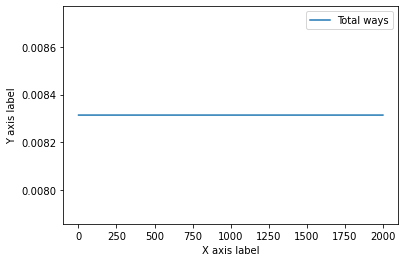

In [9]:
# In case you forgot, plt.plot works like this:
# plt.plot(x, y, label="Text for legend")
plt.plot(df.temp, df.R, label="Total ways")
# Add appropriate lines for wC and wO below...

plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend() # Show the legend

### Plotting - Plotly <a id="plotting-plotly"></a>

Plotly (abbreviated `px`) knows how to plot dataframes directly. Use `px.line` for a line plot and `px.scatter` for a scatter plot.

Modify the template below to plot the ways of each macrostate and total ways versus temperature.

In [ ]:
# If you give plotly a dataframe,
# just use the names of the columns to tell plotly what should be on each axis
# If you give a list, it will plot multiple things
px.line(df, x='T',
        # Try switching the y axis list to plot the right columns
        y=['R'],
        # Plotly labels are changed in a dictionary
        labels={'value': "Y axis label", # value is the default name given to the y-axis when multiple things are plotted
                'T': "Temperature (K)"
               }
       )